# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from scipy import stats
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
warnings.filterwarnings("ignore")

# reading housing.csv file

In [2]:
house_data = pd.read_csv(r'C:\Users\HP\Downloads\housing.csv')

In [3]:
print(house_data)

      Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0              141     31770    OneFam   One_Story        Average        1960   
1               80     11622    OneFam   One_Story  Above_Average        1961   
2               81     14267    OneFam   One_Story  Above_Average        1958   
3               93     11160    OneFam   One_Story        Average        1968   
4               74     13830    OneFam   Two_Story        Average        1997   
...            ...       ...       ...         ...            ...         ...   
2408            37      7937    OneFam        SLvl  Above_Average        1984   
2409             0      8885    OneFam   One_Story        Average        1983   
2410            62     10441    OneFam      SFoyer        Average        1992   
2411            77     10010    OneFam   One_Story        Average        1974   
2412            74      9627    OneFam   Two_Story        Average        1993   

     Exter_Cond  Total_Bsmt

In [4]:
print(house_data.head())

   Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0            

# Exlporatory Data Analysis

## I) Summary Statistics:-

####  checking the dataset shape 

In [5]:
house_data.shape

(2413, 18)

here we can see we have 18 columns and 2413 rows

#### describe() method returns the description of the data 

In [6]:
print(house_data.describe())

       Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   2413.000000    2413.000000  2413.000000    2413.000000   2413.000000   
mean      55.462495   10060.208040  1969.436386    1022.827600   1133.857024   
std       33.542416    8222.759854    29.487943     408.977848    366.442470   
min        0.000000    1300.000000  1872.000000       0.000000    334.000000   
25%       37.000000    7390.000000  1953.000000     784.000000    866.000000   
50%       60.000000    9360.000000  1971.000000     970.000000   1060.000000   
75%       77.000000   11404.000000  1998.000000    1246.000000   1350.000000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    2413.000000  2413.000000  2413.000000    2413.000000    2413.000000   
mean      339.242851     1.539163     0.377953       2.854538       1.040199   
std       423.198488     0.544667     0

here we can see the description of every column individually showing their count,
mean, standard deviation, min and max value and their 25th,50th,75th percentile

#### info() gives information about data and data type, number of records per column, null or not null values, and memory usage of the dataset

In [7]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

Here we can observe 3 different datatypes and there is no null value in the dataset.
Here we can also see Bldg_Type,House_Style,Overall_Cond,Exter_Cond, have 'object' type data

#### nunique() returns unique value for each column. Duplicated data can be handled using nunique()

In [8]:
house_data.nunique()

Lot_Frontage      124
Lot_Area         1652
Bldg_Type           5
House_Style         8
Overall_Cond        9
Year_Built        114
Exter_Cond          5
Total_Bsmt_SF     943
First_Flr_SF      979
Second_Flr_SF     569
Full_Bath           5
Half_Bath           3
Bedroom_AbvGr       7
Kitchen_AbvGr       4
Fireplaces          5
Longitude        2309
Latitude         2303
Sale_Price        790
dtype: int64

This shows the number of repeated data per column in the dataset. The value may indicate the presence of categorical columns as well. The columns 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond', Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, Fireplaces also hold categorical values as they have very few unique values and can be seen when we print the dataset as well.

## II) Missing Data Analysis:-

#### check is any null value present or not

In [9]:
house_data.isnull().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

no null value present

#### heat map to show missing values if present

<Axes: >

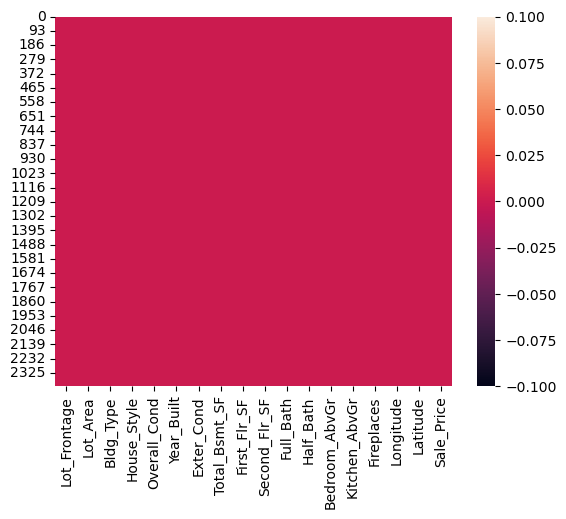

In [10]:
sns.heatmap(house_data.isnull())

Here there is no missing value present. So Heatmap doesn't show any changes

## III) Data Visualization:-

#### Boxplot: visualizing the continuous numeric data distribution and comparing the distribution across different categories

total columns affected: 14
Boxplot


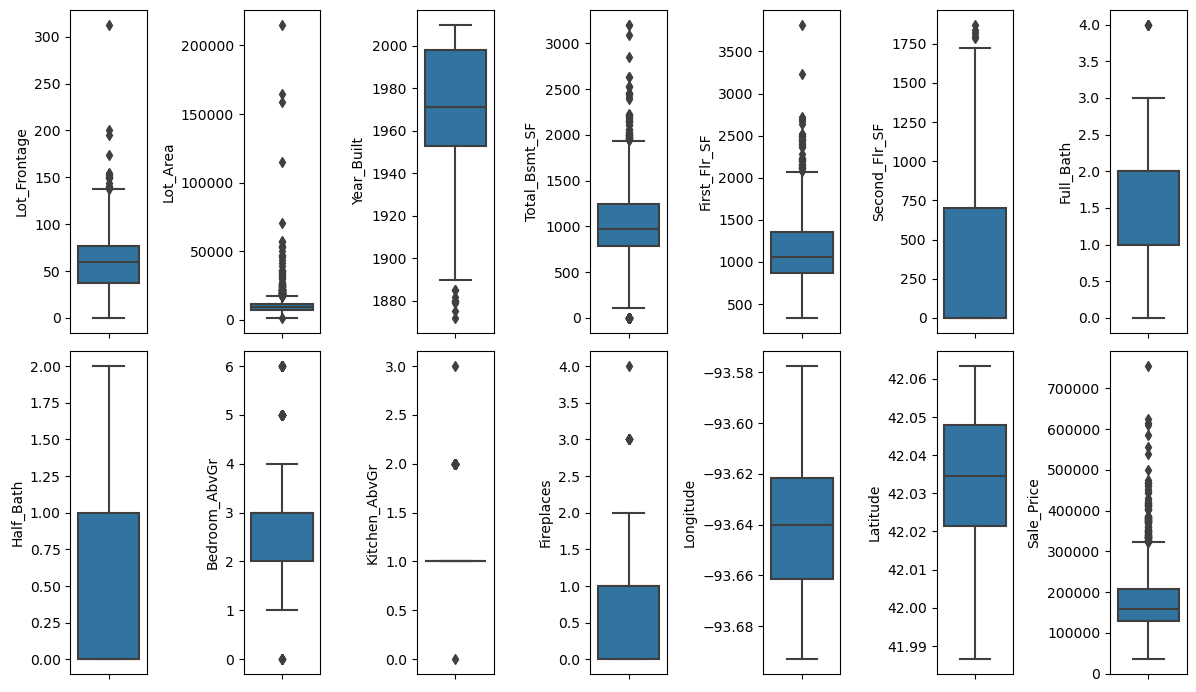

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 7))
axs = axs.flatten()
i = 0
for key,value in house_data.items():
    if pd.api.types.is_integer_dtype(value) or pd.api.types.is_float_dtype(value):   
        sns.boxplot(y=key, data=house_data, ax=axs[i])
        i=i+1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
print("total columns affected:", i)
print("Boxplot")

### Outlier Percentage

In [12]:
for key, value in house_data.items():
    if pd.api.types.is_integer_dtype(value) or pd.api.types.is_float_dtype(value):
        q1 = value.quantile(0.25)
        q3 = value.quantile(0.75)
        iqr = q3 - q1
        value_col = value[(value <= q1 - 1.5 * iqr) | (value >= q3 + 1.5 * iqr)]
        perc = np.shape(value_col)[0] * 100.0 / np.shape(house_data)[0]
        print("%s has Outliers percentage of : %.2f%%" % (key, perc))

Lot_Frontage has Outliers percentage of : 0.70%
Lot_Area has Outliers percentage of : 4.56%
Year_Built has Outliers percentage of : 0.41%
Total_Bsmt_SF has Outliers percentage of : 4.81%
First_Flr_SF has Outliers percentage of : 1.45%
Second_Flr_SF has Outliers percentage of : 0.21%
Full_Bath has Outliers percentage of : 0.17%
Half_Bath has Outliers percentage of : 0.00%
Bedroom_AbvGr has Outliers percentage of : 2.53%
Kitchen_AbvGr has Outliers percentage of : 100.00%
Fireplaces has Outliers percentage of : 0.46%
Longitude has Outliers percentage of : 0.00%
Latitude has Outliers percentage of : 0.00%
Sale_Price has Outliers percentage of : 3.94%


Here we can see the outlier percentage of all the numeric features present.

#### Histplot of Object type Categorical columns with Sales_Price (dependent variable)  as a reference

In [13]:
cat2 = ['Bldg_Type','House_Style','Overall_Cond','Exter_Cond']

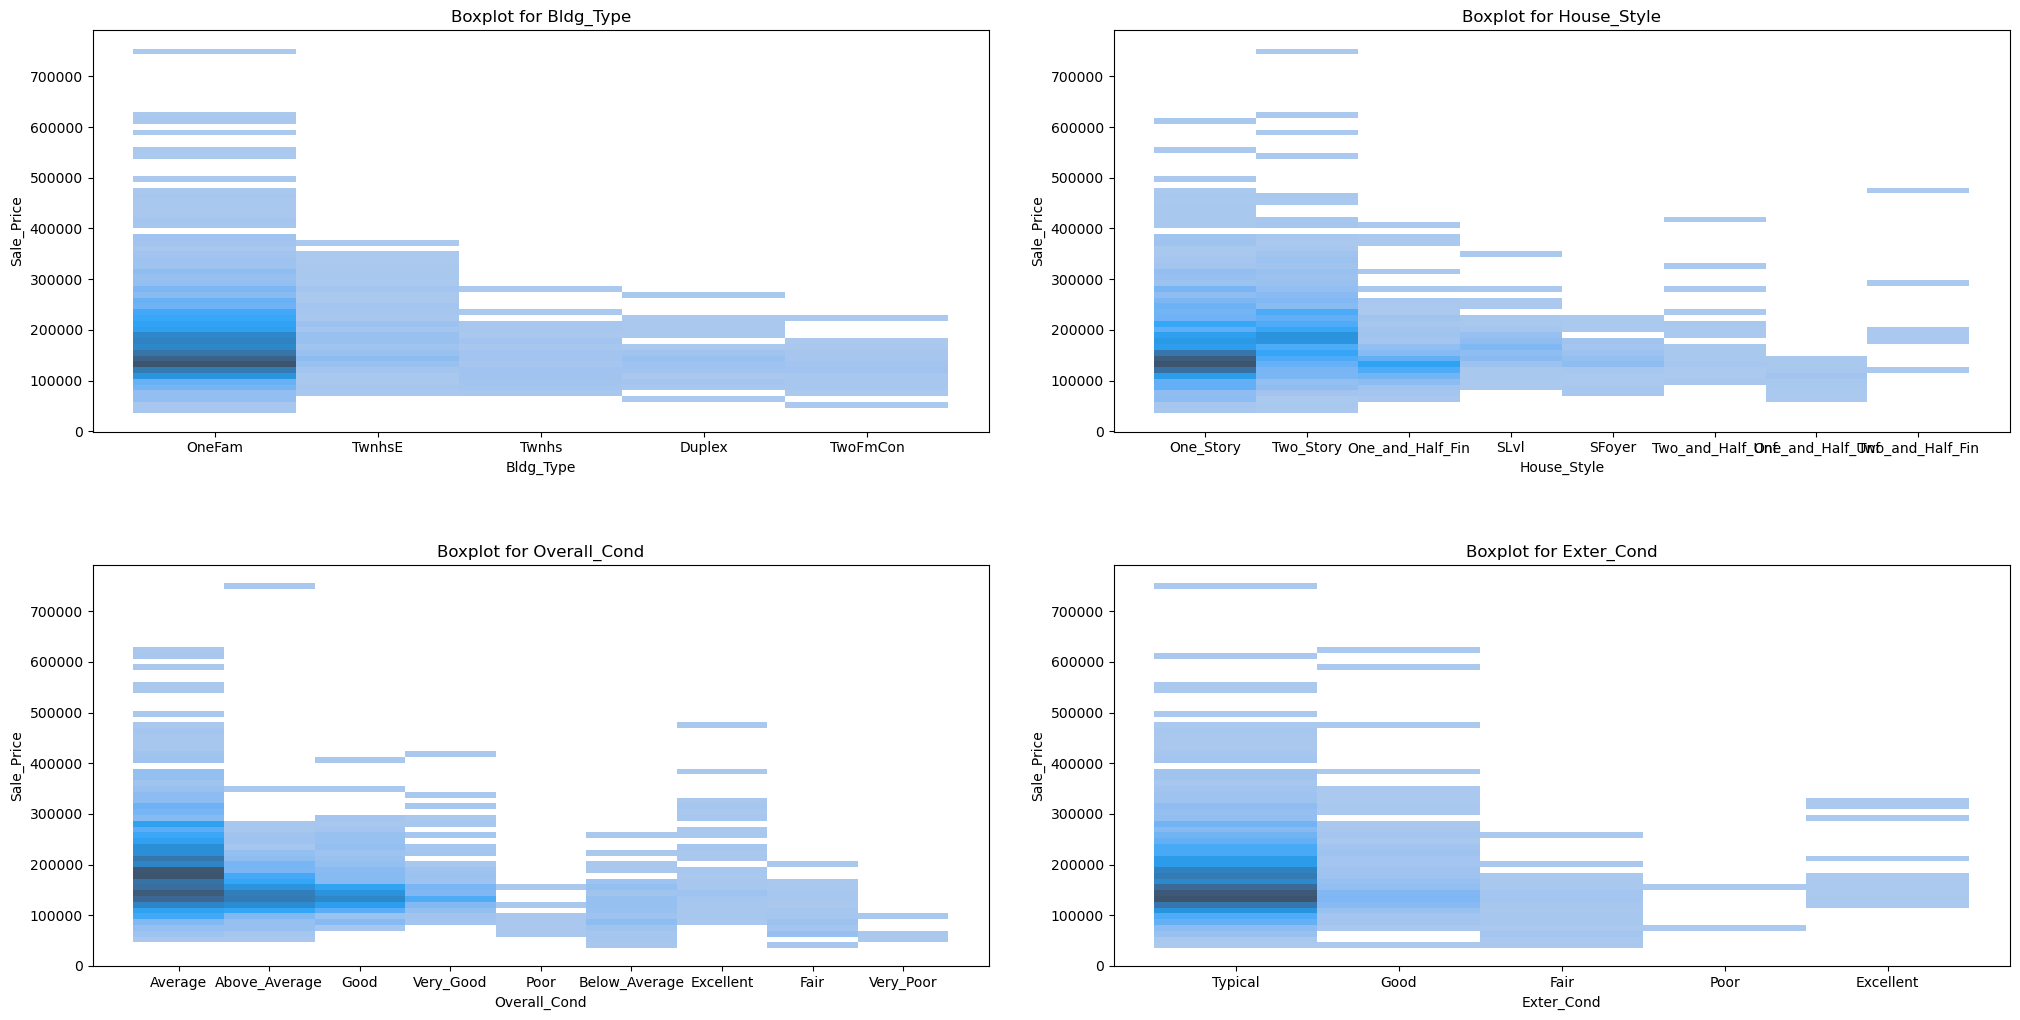

In [14]:
fig= plt.subplots(ncols=2,nrows=2, figsize=(20, 10))
for i, column in enumerate(cat2):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(x=column, y='Sale_Price', data=house_data)
    plt.title(f'Boxplot for {column}')
plt.tight_layout(pad=0, w_pad=3, h_pad=5)
plt.show()

#### Histplot of All Categorical columns (object type and numeric) with Sales_Price (dependent variable) as a reference

In [15]:
cat = ['Bldg_Type','House_Style','Overall_Cond','Exter_Cond', 'Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']

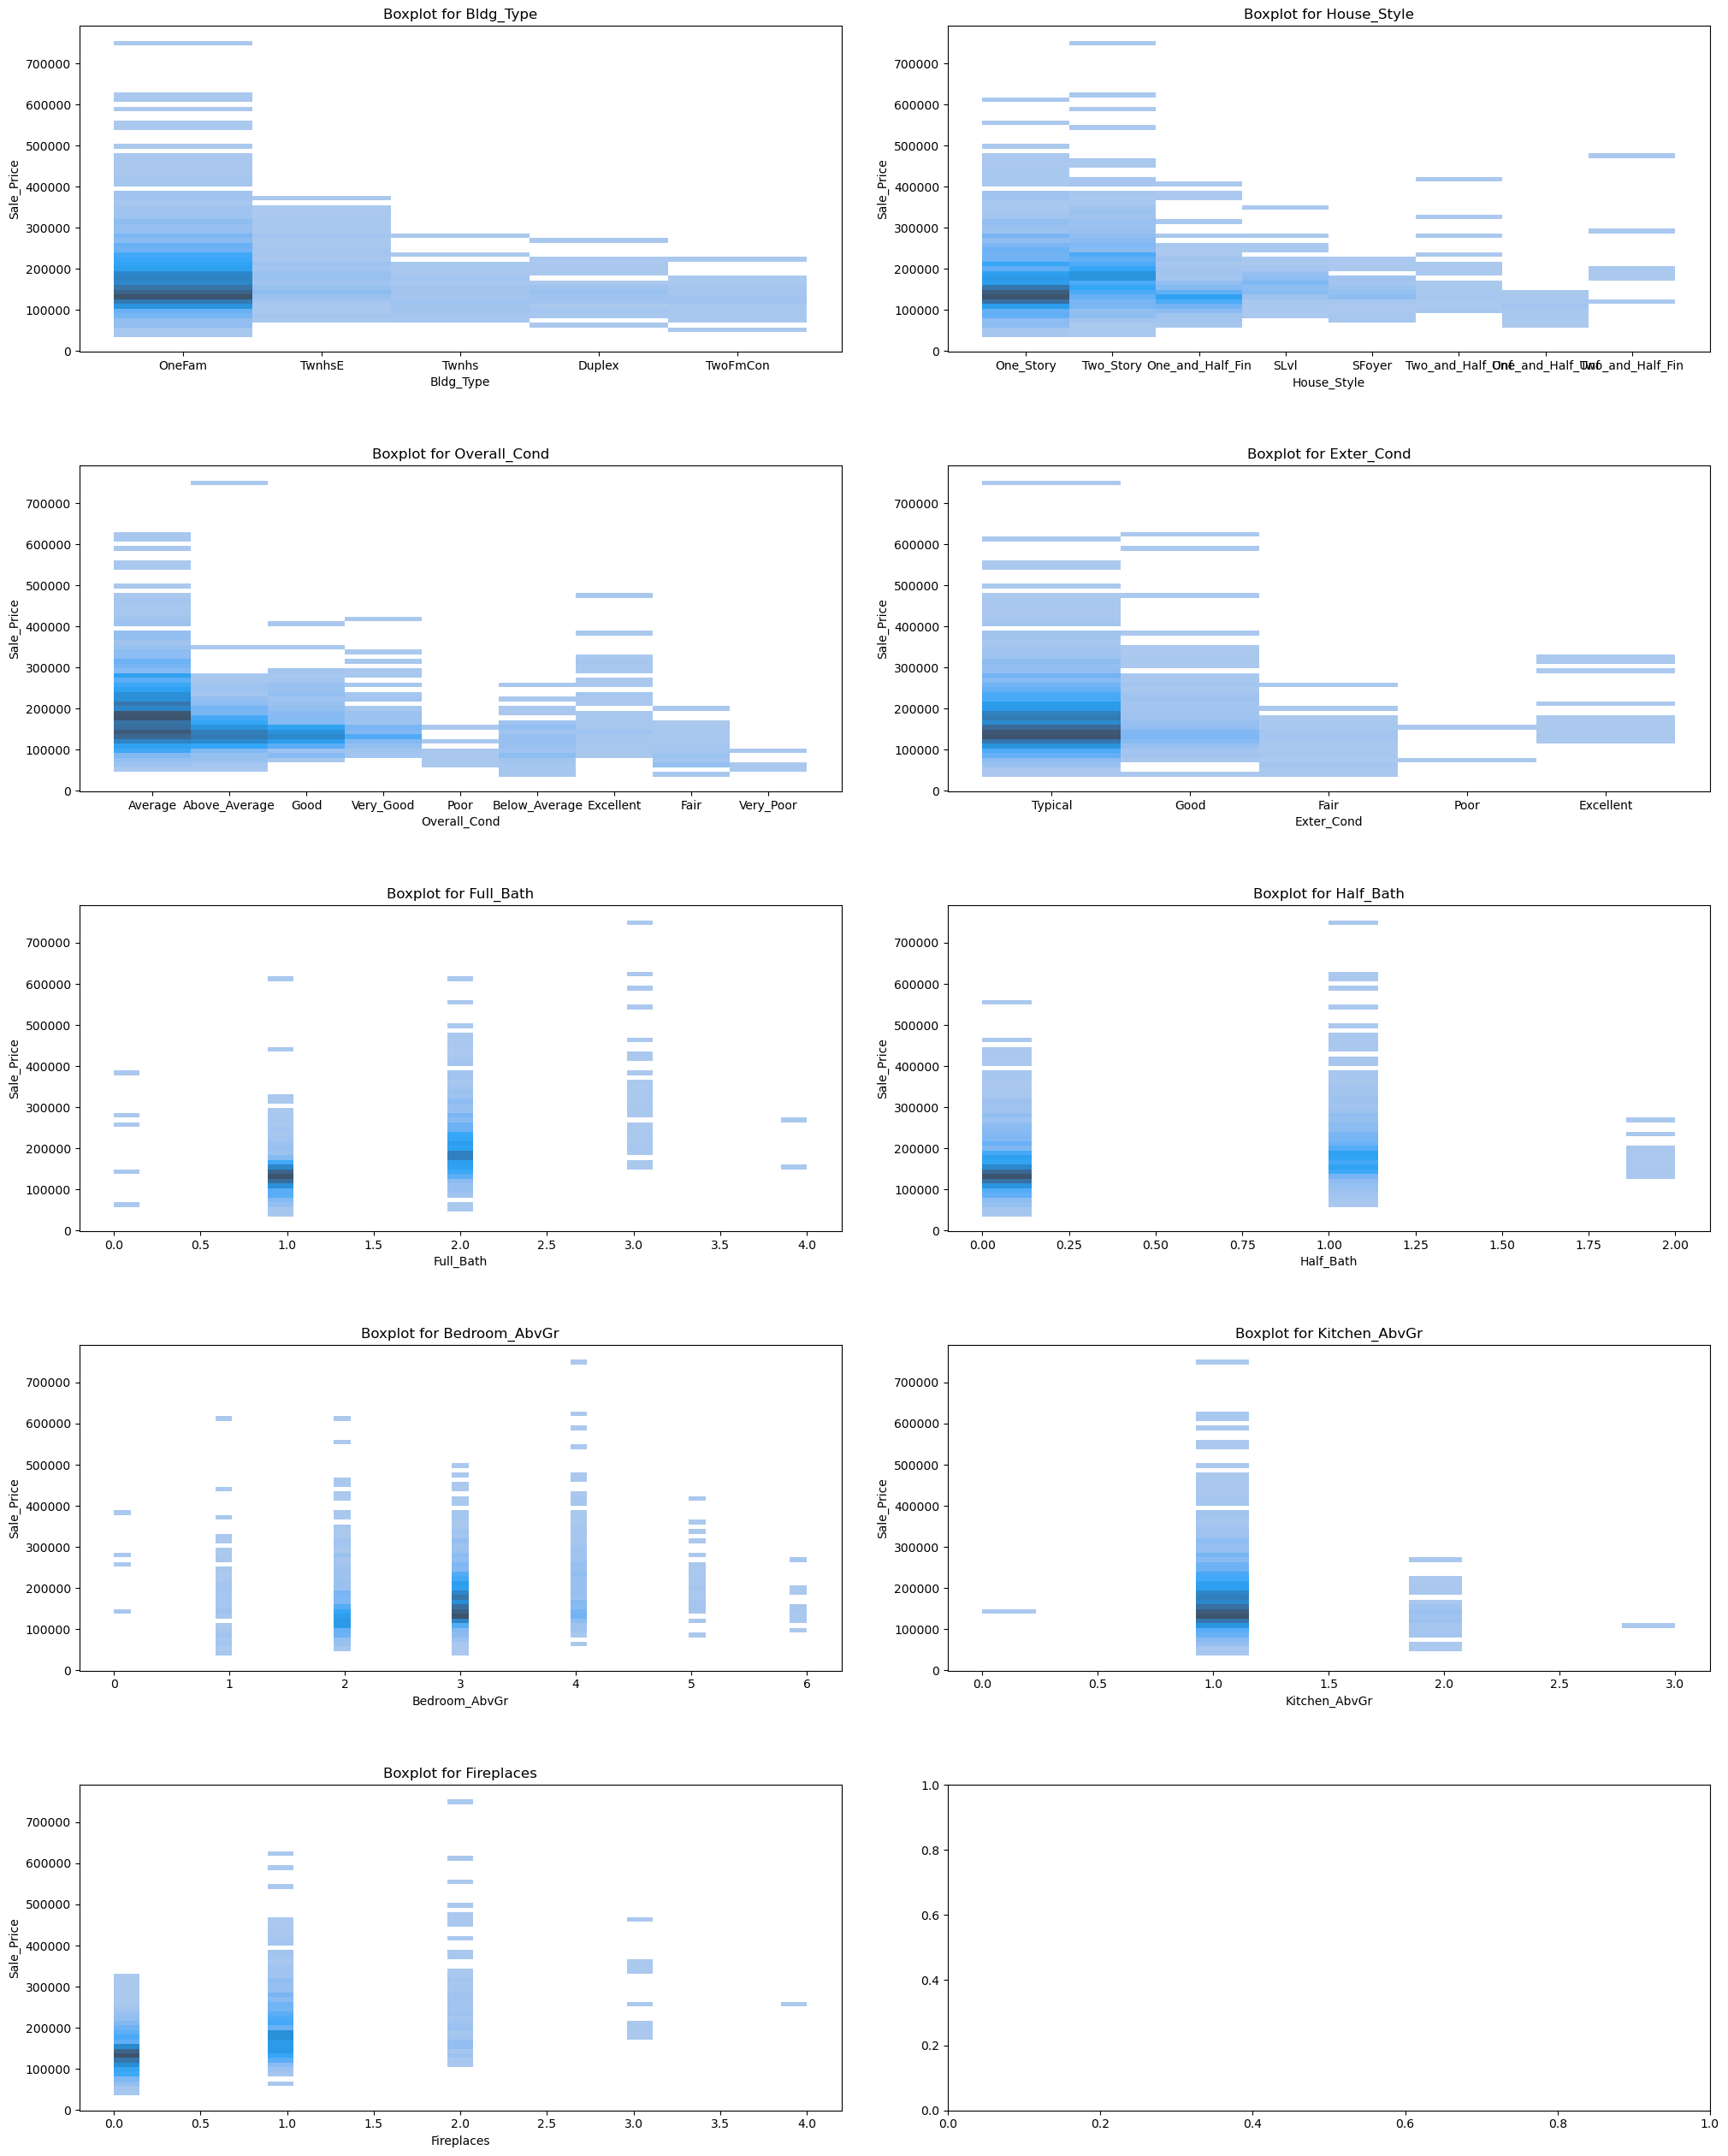

In [16]:
fig= plt.subplots(ncols=2,nrows=5, figsize=(20, 25))
for i, column in enumerate(cat):
    plt.subplot(5, 2, i + 1) 
    sns.histplot(x=column, y='Sale_Price', data=house_data)
    plt.title(f'Boxplot for {column}')
plt.tight_layout(pad=0, w_pad=3, h_pad=5)
plt.show()

#### Bar Plot:
showing each of the Categorical Columns'Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces' with their individual objects and the counts per object

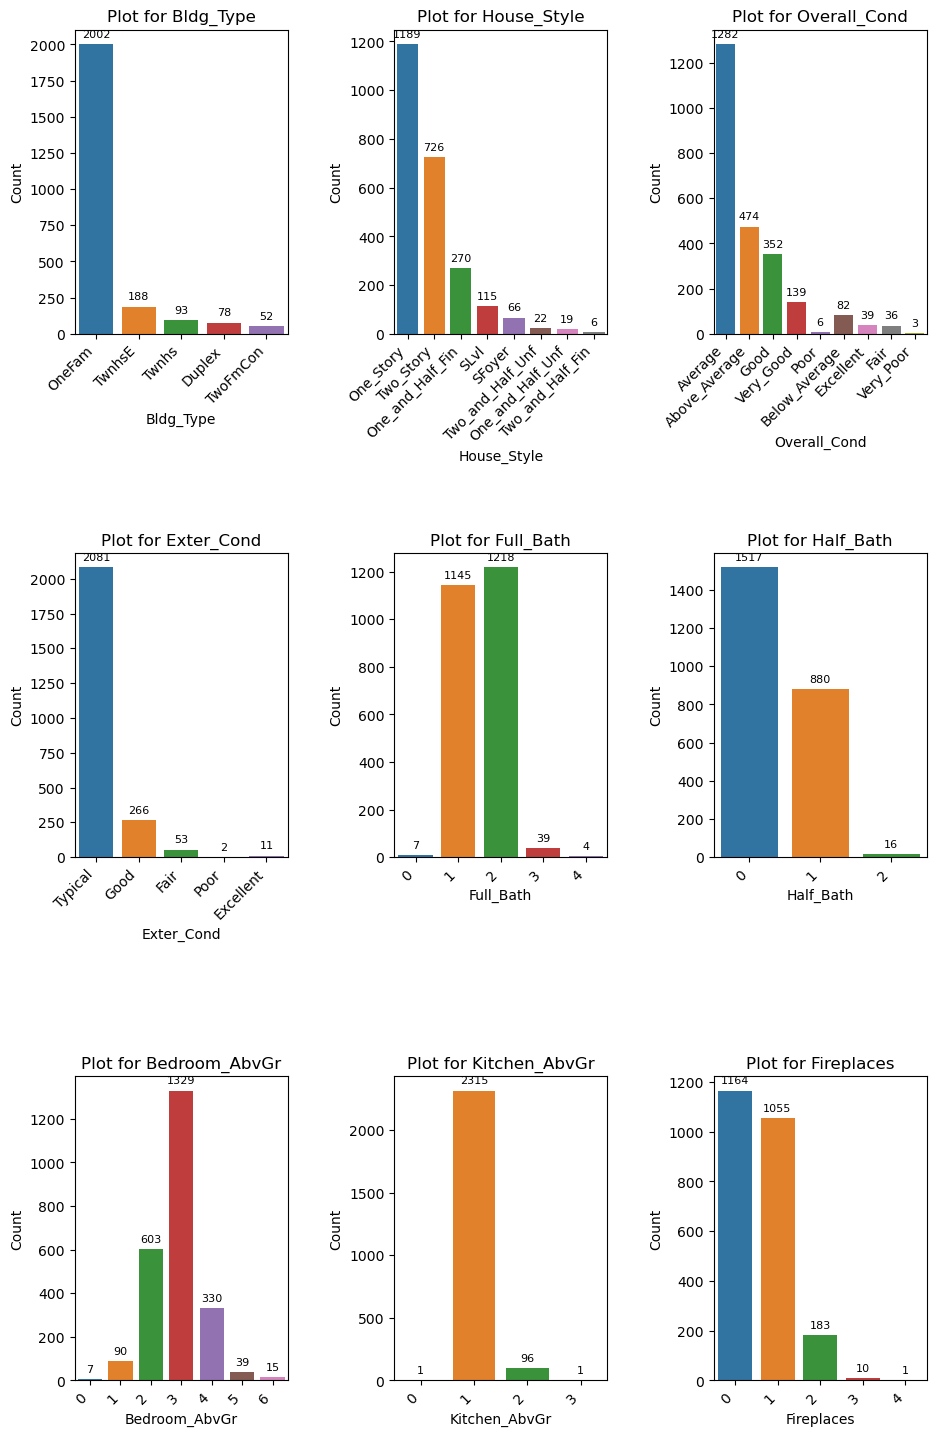

In [17]:
cat = ['Bldg_Type','House_Style','Overall_Cond','Exter_Cond','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']
fig, axes = plt.subplots(ncols=3,nrows=3, figsize=(10, 15))
axes=axes.flatten()
for i, column in enumerate(cat):
    sns.countplot(data=house_data, x=column,ax=axes[i])
    axes[i].set_title(f'Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout(pad=3, w_pad=3, h_pad=5)
plt.show()

### distribution plot

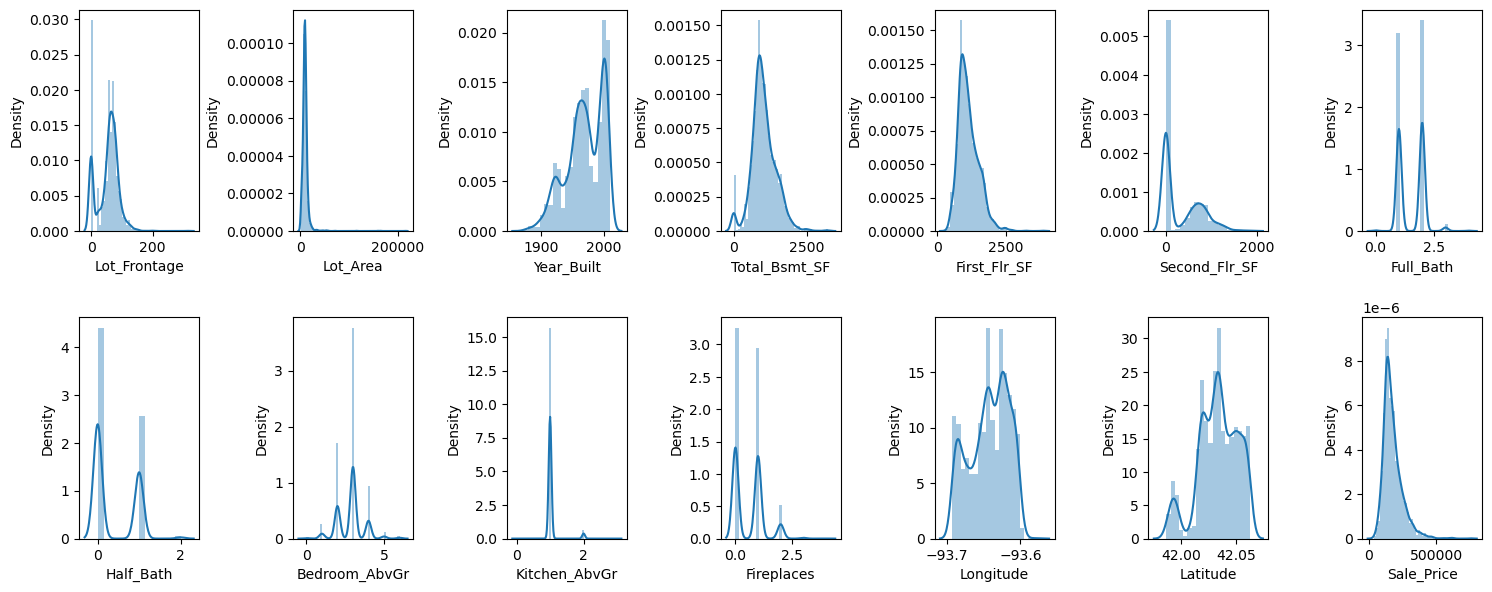

In [18]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in house_data.items():
    if pd.api.types.is_integer_dtype(v) or pd.api.types.is_float_dtype(v):
        sns.distplot(v, ax=axs[index])
        index=index+1
plt.tight_layout(pad=1, w_pad=0.5, h_pad=2)

from the above distribution plot we can infer that some of the features are not normally distributed and has some skewness to it. This skewness can be comfirmed after checking the correlation matrix. 

## IV) Correlation Analysis:-
Calculating and visualizing correlations between variables to identify relationships

#### dropping the categorical data first to prepare data for correlation analysis

In [19]:
hsdata_no_cat=house_data.drop(columns=['Bldg_Type','House_Style','Overall_Cond','Exter_Cond'])

the 4 categorical data columns have been removed

#### Correlation of the new dataframe after dropping categorical data

In [20]:
hsdata_no_cat.corr()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
Lot_Frontage,1.000000,0.111752,-0.032577,0.139344,0.196271,-0.020051,0.046891,-0.044356,0.107344,0.020522,0.029240,-0.002233,0.026206,0.160398
Lot_Area,0.111752,1.000000,0.006124,0.208979,0.305419,0.015046,0.119138,0.010567,0.138169,-0.013489,0.238730,-0.098893,-0.051481,0.275066
Year_Built,-0.032577,0.006124,1.000000,0.384244,0.273809,0.019209,0.441418,0.274389,-0.042448,-0.137998,0.159663,-0.424697,0.212627,0.533158
Total_Bsmt_SF,0.139344,0.208979,0.384244,1.000000,0.766565,-0.215670,0.316821,-0.087898,0.090679,-0.028391,0.313337,-0.153146,0.164925,0.642354
First_Flr_SF,0.196271,0.305419,0.273809,0.766565,1.000000,-0.265052,0.366844,-0.136403,0.137210,0.076361,0.400392,-0.115597,0.125977,0.634672
Second_Flr_SF,-0.020051,0.015046,0.019209,-0.215670,-0.265052,1.000000,0.420907,0.626065,0.510590,0.083579,0.175173,-0.058138,0.087136,0.293338
Full_Bath,0.046891,0.119138,0.441418,0.316821,0.366844,0.420907,1.000000,0.176045,0.382962,0.196142,0.244596,-0.225956,0.186127,0.548635
Half_Bath,-0.044356,0.010567,0.274389,-0.087898,-0.136403,0.626065,0.176045,1.000000,0.270618,-0.044196,0.187236,-0.113804,0.154415,0.292314
Bedroom_AbvGr,0.107344,0.138169,-0.042448,0.090679,0.137210,0.510590,0.382962,0.270618,1.000000,0.241605,0.097119,-0.034338,0.023603,0.183634
Kitchen_AbvGr,0.020522,-0.013489,-0.137998,-0.028391,0.076361,0.083579,0.196142,-0.044196,0.241605,1.000000,-0.109825,0.079593,-0.049201,-0.114394


In [21]:
abs_cor=np.abs(hsdata_no_cat.corr())
abs_cor

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
Lot_Frontage,1.000000,0.111752,0.032577,0.139344,0.196271,0.020051,0.046891,0.044356,0.107344,0.020522,0.029240,0.002233,0.026206,0.160398
Lot_Area,0.111752,1.000000,0.006124,0.208979,0.305419,0.015046,0.119138,0.010567,0.138169,0.013489,0.238730,0.098893,0.051481,0.275066
Year_Built,0.032577,0.006124,1.000000,0.384244,0.273809,0.019209,0.441418,0.274389,0.042448,0.137998,0.159663,0.424697,0.212627,0.533158
Total_Bsmt_SF,0.139344,0.208979,0.384244,1.000000,0.766565,0.215670,0.316821,0.087898,0.090679,0.028391,0.313337,0.153146,0.164925,0.642354
First_Flr_SF,0.196271,0.305419,0.273809,0.766565,1.000000,0.265052,0.366844,0.136403,0.137210,0.076361,0.400392,0.115597,0.125977,0.634672
Second_Flr_SF,0.020051,0.015046,0.019209,0.215670,0.265052,1.000000,0.420907,0.626065,0.510590,0.083579,0.175173,0.058138,0.087136,0.293338
Full_Bath,0.046891,0.119138,0.441418,0.316821,0.366844,0.420907,1.000000,0.176045,0.382962,0.196142,0.244596,0.225956,0.186127,0.548635
Half_Bath,0.044356,0.010567,0.274389,0.087898,0.136403,0.626065,0.176045,1.000000,0.270618,0.044196,0.187236,0.113804,0.154415,0.292314
Bedroom_AbvGr,0.107344,0.138169,0.042448,0.090679,0.137210,0.510590,0.382962,0.270618,1.000000,0.241605,0.097119,0.034338,0.023603,0.183634
Kitchen_AbvGr,0.020522,0.013489,0.137998,0.028391,0.076361,0.083579,0.196142,0.044196,0.241605,1.000000,0.109825,0.079593,0.049201,0.114394


the absolute correlation values are shown above

#### Correlation Heatmap

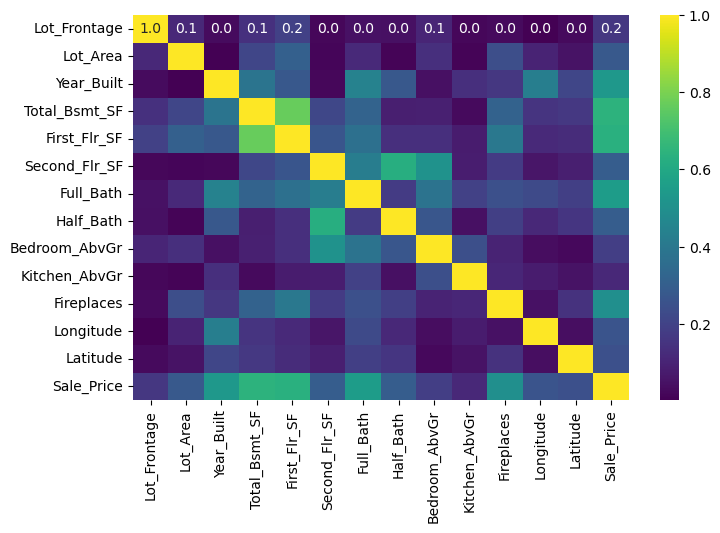

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(np.abs(hsdata_no_cat.corr()), cmap='viridis', fmt=".1f",annot=True)
plt.show()

the heatmap shows that correlation heatmap generated, we can infer that the features 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Full_Bath' have positive correlation among them and have high correlation coefficients close to 1. This infers a strong linear relationship between them and may indicate multicollinearity.

### checking skewness of the Above 4 features 

In [23]:
colinear_column = ['Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Full_Bath']
column_correlated= hsdata_no_cat[colinear_column]
for col in column_correlated.columns:
    if col in column_correlated:
        print(col,":",np.abs(column_correlated[col].skew()))

Year_Built : 0.5867241005730729
Total_Bsmt_SF : 0.45638579648376104
First_Flr_SF : 1.0433010574738528
Full_Bath : 0.24501289387833888


here we can observe that all the features are right skewed. The 'First_Flr_SF' has skewness more than 1. This indicates a substantial devaition from normality. So to handle the distribution properly, we have applied Transformation.

### Log transformation to fix the skewness of data

In [24]:
hsdata_no_cat['First_Flr_SF'] = np.log1p(hsdata_no_cat['First_Flr_SF'])

In [25]:
for col in colinear_column:
    if col in colinear_column:
        print(col,":",np.abs(hsdata_no_cat[col].skew()))

Year_Built : 0.5867241005730729
Total_Bsmt_SF : 0.45638579648376104
First_Flr_SF : 0.02460020308217565
Full_Bath : 0.24501289387833888


We can observe that the Skewness is within limit now for a normal distribution.

### copying the transformed column to the dataset

In [26]:
house_data['First_Flr_SF']=hsdata_no_cat['First_Flr_SF']

### Quantile-quantile plot
for all data

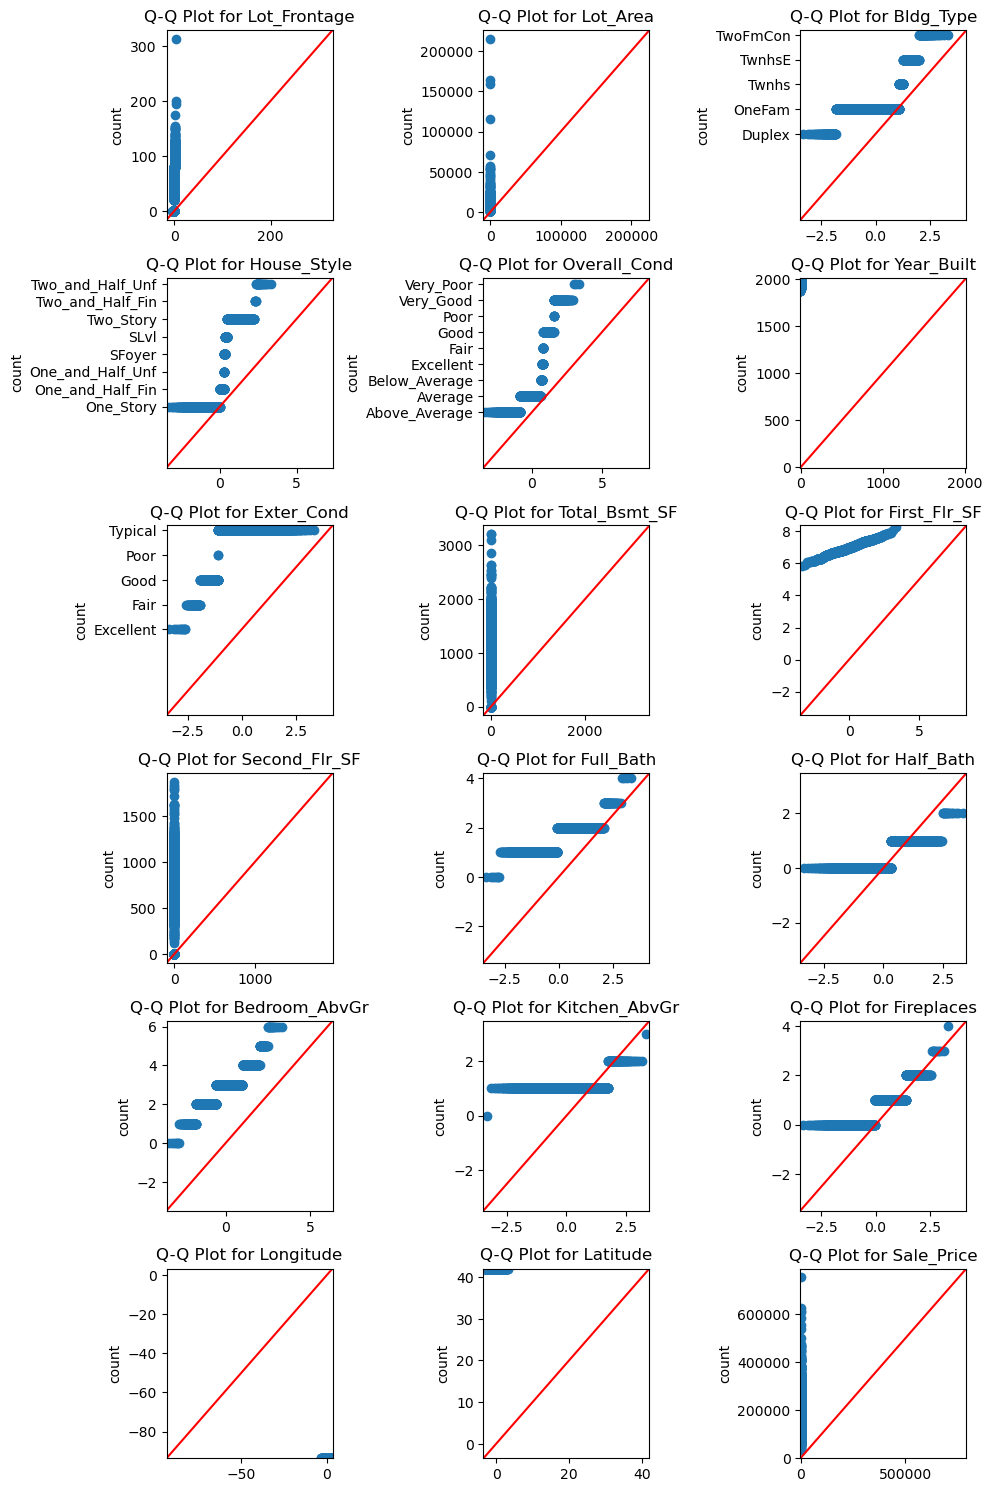

In [27]:
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(10, 15))
axs = axs.flatten()
for i, column in enumerate(house_data):
    sm.qqplot(house_data[column], dist=getattr(stats, 'norm'), ax=axs[i], line='45')
    axs[i].set_title(f'Q-Q Plot for {column}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('count')
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

This plot compares the quantiles of observed data against quantiles of expected distribution. 

# Data Preparation

#### making a copy of the dataset for data preparation 

In [28]:
new_house_data=house_data
print(new_house_data.tail(5))

      Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
2408            37      7937    OneFam        SLvl  Above_Average        1984   
2409             0      8885    OneFam   One_Story        Average        1983   
2410            62     10441    OneFam      SFoyer        Average        1992   
2411            77     10010    OneFam   One_Story        Average        1974   
2412            74      9627    OneFam   Two_Story        Average        1993   

     Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
2408    Typical           1003      6.911747              0          1   
2409    Typical            864      6.805723              0          1   
2410    Typical            912      6.878326              0          1   
2411    Typical           1389      7.237059              0          1   
2412    Typical            996      6.904751           1004          2   

      Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude

### Encoding Categorical data
using label encoder to encode 4 object type categorical data

In [29]:
cat = ['Bldg_Type','House_Style','Overall_Cond','Exter_Cond']
encd = {} 
encdr = LabelEncoder()
for j in cat:
    print(f'\nNew Data for Categorical Column {j} :')
    new_house_data[j] = encdr.fit_transform(new_house_data[j])
    print(new_house_data[j].unique())
print('\n***Data inside categorical columns have changed to numeric data***')
print('')
print("Prepared data:")
print(new_house_data)   


New Data for Categorical Column Bldg_Type :
[1 3 2 0 4]

New Data for Categorical Column House_Style :
[0 5 1 4 3 7 2 6]

New Data for Categorical Column Overall_Cond :
[1 0 5 7 6 2 3 4 8]

New Data for Categorical Column Exter_Cond :
[4 2 1 3 0]

***Data inside categorical columns have changed to numeric data***

Prepared data:
      Lot_Frontage  Lot_Area  Bldg_Type  House_Style  Overall_Cond  \
0              141     31770          1            0             1   
1               80     11622          1            0             0   
2               81     14267          1            0             0   
3               93     11160          1            0             1   
4               74     13830          1            5             1   
...            ...       ...        ...          ...           ...   
2408            37      7937          1            4             0   
2409             0      8885          1            0             1   
2410            62     10441          

### rechecking the skewness for new encoded dataset

In [30]:
for col in new_house_data.columns:
    if col in new_house_data:
        print(col,":",np.abs(new_house_data[col].skew()))

Lot_Frontage : 0.08111445592594824
Lot_Area : 13.393920620046206
Bldg_Type : 2.216017225888531
House_Style : 0.4986446130613545
Overall_Cond : 1.3090291101799265
Year_Built : 0.5867241005730729
Exter_Cond : 2.406885407242983
Total_Bsmt_SF : 0.45638579648376104
First_Flr_SF : 0.02460020308217565
Second_Flr_SF : 0.804117801386001
Full_Bath : 0.24501289387833888
Half_Bath : 0.6639923945958431
Bedroom_AbvGr : 0.18415873770874286
Kitchen_AbvGr : 4.681574232610174
Fireplaces : 0.7390754323691339
Longitude : 0.33751271965788754
Latitude : 0.5077781135671717
Sale_Price : 1.7453580480340125


here we observe that the skew value of some non-collinear column are high. This can be adjusted through outlier removal.

### Outliers Detection and Removal

#### Calculating z-scores of all numericcal columns excluding the dependent variable column Sales_Price so iloc -1

In [31]:
z_scr = np.abs(stats.zscore(new_house_data.iloc[:,:-1]))
#z_scr =stats.zscore(new_house_data)
thresh = 2
outliers = (z_scr > thresh).any(axis=1)

#### checking Z score of all data

In [32]:
print(z_scr)

      Lot_Frontage  Lot_Area  Bldg_Type  House_Style  Overall_Cond  \
0         2.550658  2.640755   0.312838     0.863489      0.421417   
1         0.731688  0.189975   0.312838     0.863489      0.908662   
2         0.761507  0.511709   0.312838     0.863489      0.908662   
3         1.119338  0.133777   0.312838     0.863489      0.421417   
4         0.552773  0.458553   0.312838     1.313276      0.421417   
...            ...       ...        ...          ...           ...   
2408      0.550536  0.258265   0.312838     0.877923      0.908662   
2409      1.653846  0.142951   0.312838     0.863489      0.421417   
2410      0.194943  0.046319   0.312838     0.442570      0.421417   
2411      0.642231  0.006107   0.312838     0.863489      0.421417   
2412      0.552773  0.052695   0.312838     1.313276      0.421417   

      Year_Built  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0       0.320075    0.388176       0.139822      1.364192       0.801783   
1      

#### Remove rows with outliers

In [33]:
clean_data = new_house_data[~outliers]

#### Reset the index of the cleaned DataFrame and Print

In [34]:
clean_data.reset_index(drop=True, inplace=True)
print(clean_data.head())

   Lot_Frontage  Lot_Area  Bldg_Type  House_Style  Overall_Cond  Year_Built  \
0            80     11622          1            0             0        1961   
1            81     14267          1            0             0        1958   
2            74     13830          1            5             1        1997   
3            78      9978          1            5             0        1998   
4            60      7500          1            5             1        1999   

   Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0           4            882      6.799056              0          1   
1           4           1329      7.192934              0          1   
2           4            928      6.834109            701          2   
3           4            926      6.831954            678          2   
4           4            994      6.936343            776          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0

### checking skewness of cleaned data

In [35]:
for col in clean_data.columns:
    if col in clean_data:
        print(col,":",np.abs(clean_data[col].skew()))
print("\nShape of cleaned data:")        
print(np.shape(clean_data))

Lot_Frontage : 0.7909474859677402
Lot_Area : 0.5564583341216193
Bldg_Type : 3.8729719125155233
House_Style : 0.4613114279099524
Overall_Cond : 1.582533474045197
Year_Built : 0.4594393346263632
Exter_Cond : 0.0
Total_Bsmt_SF : 0.4901014184377167
First_Flr_SF : 0.17463676769277764
Second_Flr_SF : 0.5954899789031076
Full_Bath : 0.07469697808724175
Half_Bath : 0.36621863258107323
Bedroom_AbvGr : 0.06048862624115703
Kitchen_AbvGr : 0.0
Fireplaces : 0.00324544170250451
Longitude : 0.25377806607618525
Latitude : 0.038164131924055024
Sale_Price : 1.1189076961527173

Shape of cleaned data:
(1234, 18)


### Correlation Heatmap of cleaned data 

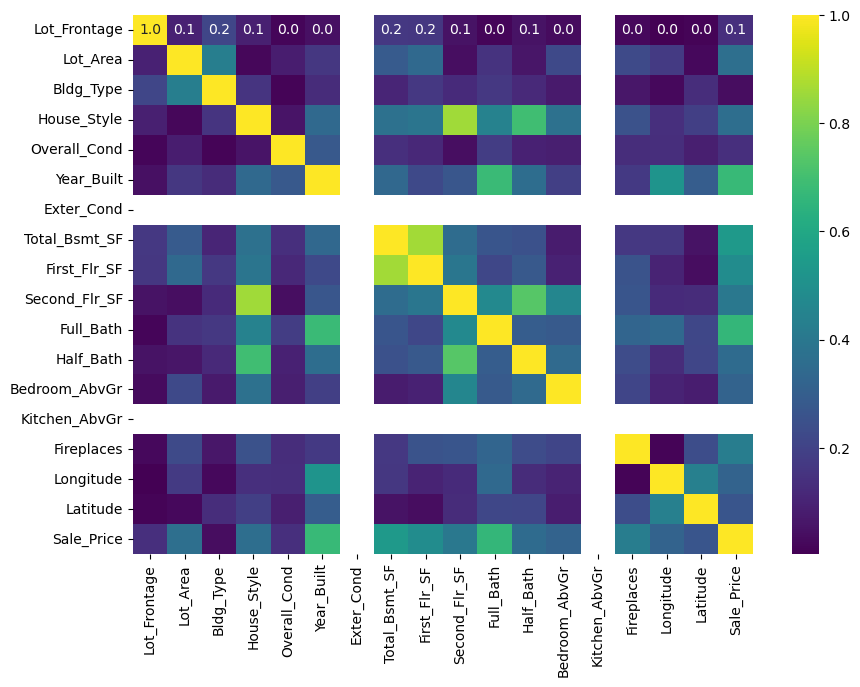

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(np.abs(clean_data.corr()), cmap='viridis',fmt=".1f",annot=True)
plt.show()

From the observation of the new Correlation Heatmap, we can suggest that the dataset is free of multicollinearity. The feature Exter_Cond and Kitchen_AbvGr have 0 skewness. That means these features are normally distributed without any deviation.

### Boxplot of cleaned data

Total columns affected: 18


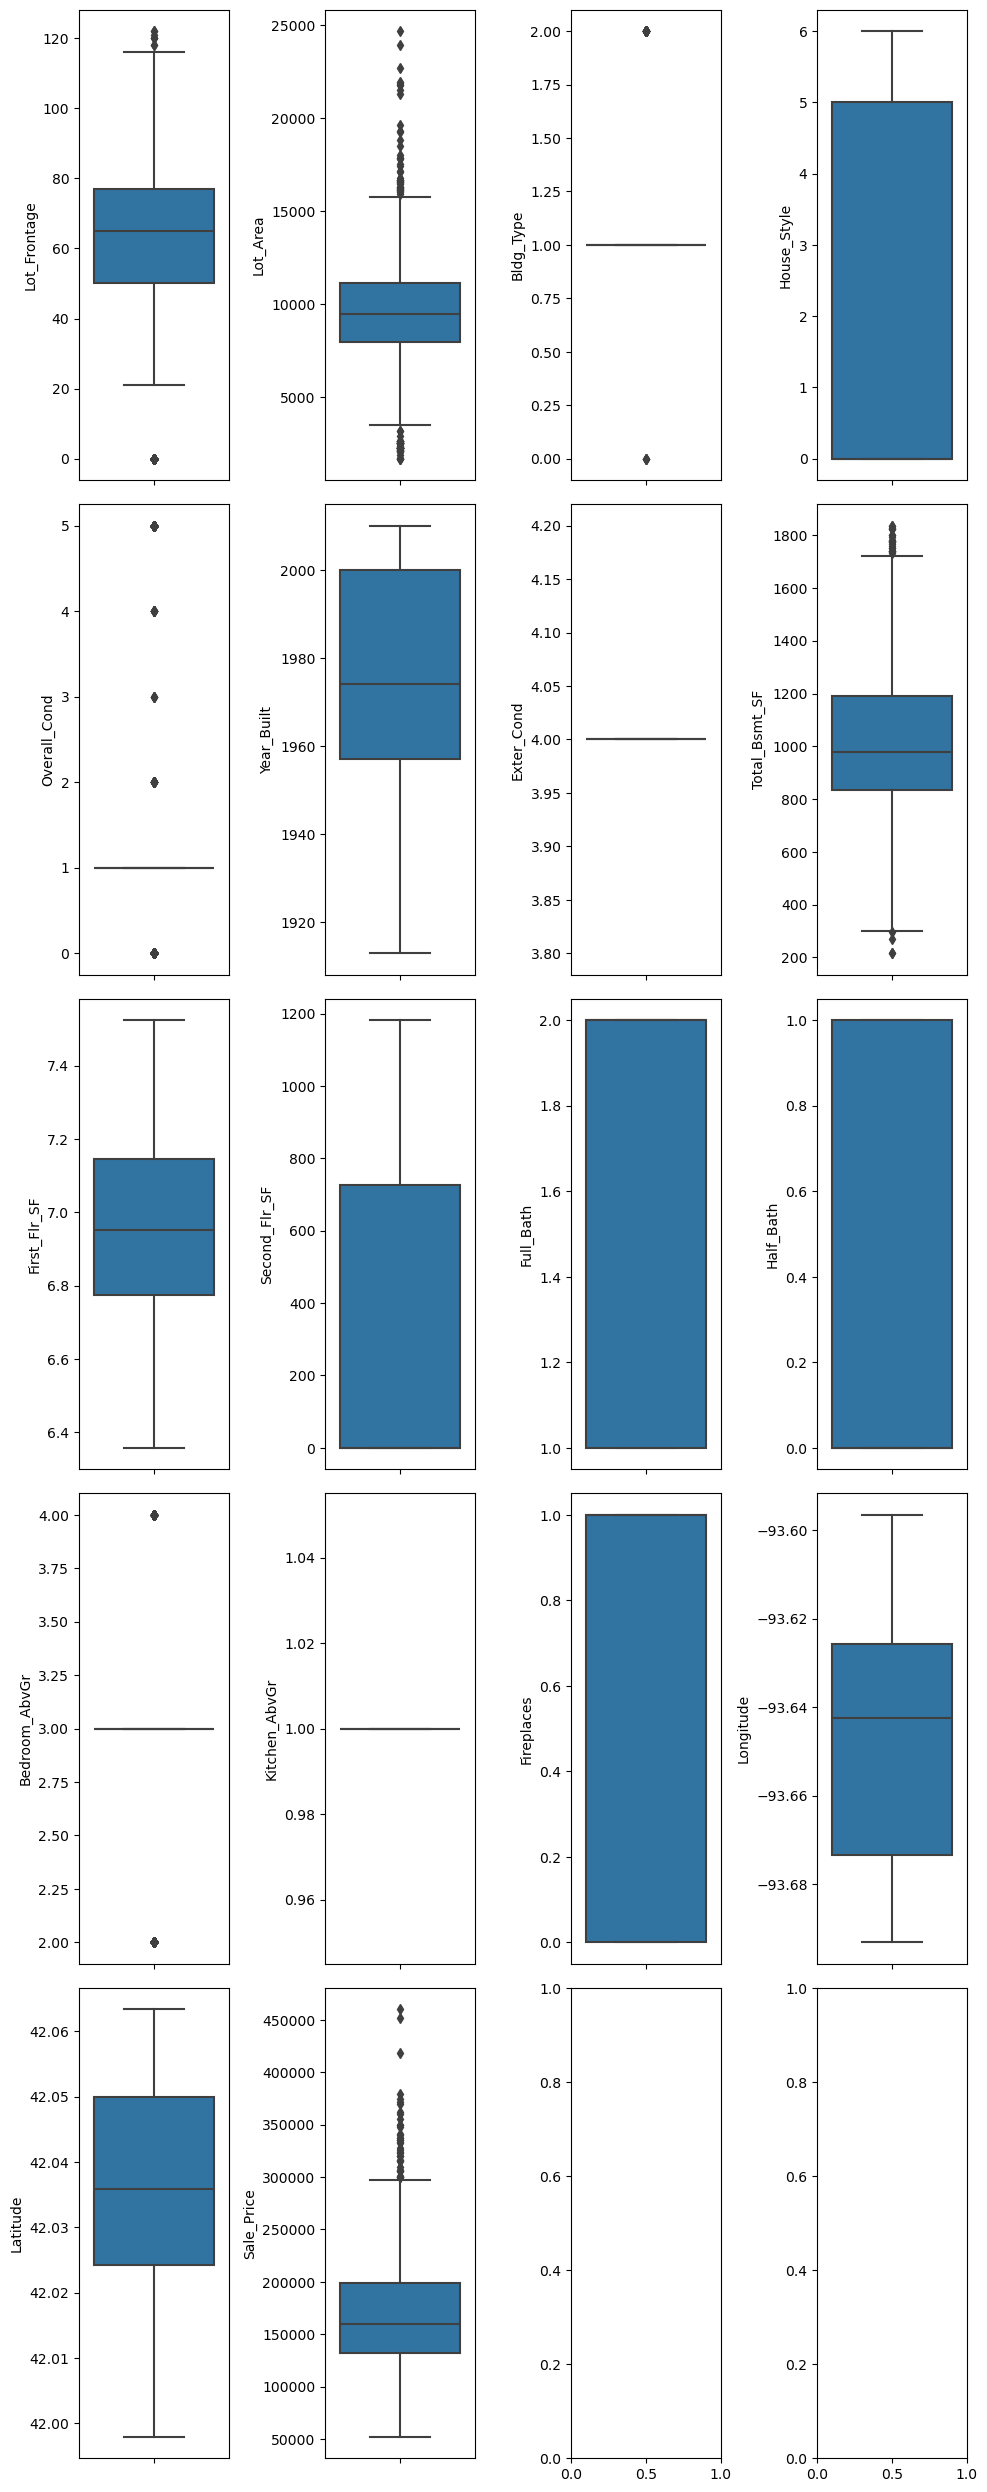

In [37]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(10, 25))
axs = axs.flatten()
i = 0
for k,v in clean_data.items():
    if pd.api.types.is_integer_dtype(v) or pd.api.types.is_float_dtype(v):   
        sns.boxplot(y=k, data=clean_data, ax=axs[i])
        i += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
print("Total columns affected:", i)

In [38]:
print(clean_data)

      Lot_Frontage  Lot_Area  Bldg_Type  House_Style  Overall_Cond  \
0               80     11622          1            0             0   
1               81     14267          1            0             0   
2               74     13830          1            5             1   
3               78      9978          1            5             0   
4               60      7500          1            5             1   
...            ...       ...        ...          ...           ...   
1229            60     11040          1            1             0   
1230            60      8520          1            1             1   
1231             0     16669          1            0             0   
1232            54     13811          1            0             0   
1233            50      8049          1            0             1   

      Year_Built  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0           1961           4            882      6.799056              0   
1      

Data with Outliers removed

# Modelling

## Splitting Data 
as per Dependent variable (data_y) and Indepedent variable (data_x)

In [39]:
data_x = clean_data.drop("Sale_Price",axis=1)
data_x

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
0,80,11622,1,0,0,1961,4,882,6.799056,0,1,0,2,1,0,-93.619756,42.053014
1,81,14267,1,0,0,1958,4,1329,7.192934,0,1,1,3,1,0,-93.619387,42.052659
2,74,13830,1,5,1,1997,4,928,6.834109,701,2,1,3,1,1,-93.638933,42.060899
3,78,9978,1,5,0,1998,4,926,6.831954,678,2,1,3,1,1,-93.638925,42.060779
4,60,7500,1,5,1,1999,4,994,6.936343,776,2,1,3,1,1,-93.639068,42.059193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,60,11040,1,1,0,1920,4,637,6.800170,439,1,1,3,1,0,-93.615307,42.019025
1230,60,8520,1,1,1,1916,4,216,6.357842,360,1,0,2,1,0,-93.604344,42.022603
1231,0,16669,1,0,0,1981,4,1686,7.443078,0,2,1,2,1,1,-93.649773,41.997906
1232,54,13811,1,0,0,1987,4,1112,7.037028,0,2,0,2,1,1,-93.646099,41.999553


In [40]:
data_y=clean_data["Sale_Price"]
data_y

0       105000
1       172000
2       189900
3       195500
4       189000
         ...  
1229    108000
1230     78000
1231    228000
1232    176000
1233    180000
Name: Sale_Price, Length: 1234, dtype: int64

## Adding seed as per my studnet ID into Training and Test sets

My Student ID: X22242821
So seed will be 22242821

In [41]:
np.random.seed(22242821)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y)
x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
722,63,7875,1,5,1,1996,4,691,6.539586,862,2,1,3,1,0,-93.637865,42.059562
720,56,8872,1,4,1,1997,4,384,6.626718,630,2,1,3,1,1,-93.637189,42.061242
689,68,9520,1,0,1,1953,4,911,6.836259,0,1,0,2,1,0,-93.665829,42.017962
382,43,10667,1,5,0,1996,4,799,6.719013,834,2,1,3,1,1,-93.690401,42.020817
66,70,8197,1,0,1,2003,4,1480,7.300473,0,2,0,3,1,0,-93.617553,42.043984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,60,10410,1,1,5,1916,4,660,6.695799,704,2,1,3,1,0,-93.614421,42.037679
741,80,8000,1,5,0,1974,4,1084,6.989335,793,2,1,4,1,1,-93.632191,42.048765
538,0,12122,1,3,3,1961,4,944,6.907755,0,1,0,3,1,0,-93.624499,42.043845
183,0,10710,1,0,5,1966,4,864,7.021976,0,1,0,3,1,1,-93.626521,42.048486


#### Length of Train and Test data

In [42]:
print('lenght of Train data:',len(x_train),'\nlength of Test data:',len(x_test))

lenght of Train data: 925 
length of Test data: 309


# Machine Learning Model

#### Feature scaling of the train and test set

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### OLS Model

#### Intermediate OLS Model

In [44]:
X_train_intermediate = sm.add_constant(X_train_scaled)
model_intermediate_ols = sm.OLS(y_train, X_train_intermediate).fit()

#### Final OLS Model

In [45]:
X_train_final = sm.add_constant(X_train_scaled)  
model_final_ols = sm.OLS(y_train, X_train_final).fit()

### Ridge Regression Model

#### Intermediate Ridge Regression Model

In [46]:
alphas = np.logspace(-3, 4, 17)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-03, 2.73841963e-03, 7.49894209e-03, 2.05352503e-02,
       5.62341325e-02, 1.53992653e-01, 4.21696503e-01, 1.15478198e+00,
       3.16227766e+00, 8.65964323e+00, 2.37137371e+01, 6.49381632e+01,
       1.77827941e+02, 4.86967525e+02, 1.33352143e+03, 3.65174127e+03,
       1.00000000e+04]),
        store_cv_values=True)

#### Final Ridge Regression Model

In [47]:
final_ridge = Ridge(alpha=ridge_cv.alpha_)
final_ridge.fit(X_train_scaled, y_train)
x=final_ridge.fit(X_train_scaled, y_train)


# Interpretation 
### OLS model

#### Intermediate OLS Model Summary

In [48]:
print("Intermediate Ols Model Summary:")
print(model_intermediate_ols.summary())

Intermediate Ols Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     295.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:14:44   Log-Likelihood:                -10581.
No. Observations:                 925   AIC:                         2.119e+04
Df Residuals:                     909   BIC:                         2.127e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.716e+0

#### Final OLS Model Summary

In [49]:
print("Final Ols Model Summary:")
print(model_final_ols.summary())

Final Ols Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     295.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:14:44   Log-Likelihood:                -10581.
No. Observations:                 925   AIC:                         2.119e+04
Df Residuals:                     909   BIC:                         2.127e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.716e+05    74

### Ridge Regressio Model

#### Intermediate Ridge Regression Model

Lot_Frontage      1958.605177
Lot_Area          3419.610309
Bldg_Type        -1973.906176
House_Style       4534.998914
Overall_Cond      4044.863747
Year_Built       14964.752669
Exter_Cond           0.000000
Total_Bsmt_SF    18675.515723
First_Flr_SF     16999.441410
Second_Flr_SF    27536.909781
Full_Bath          772.205069
Half_Bath        -1801.586825
Bedroom_AbvGr    -4517.947936
Kitchen_AbvGr        0.000000
Fireplaces        3905.622448
Longitude        -4495.401790
Latitude          5903.027366
dtype: float64
Intercept Intermediate Model: 171569.07


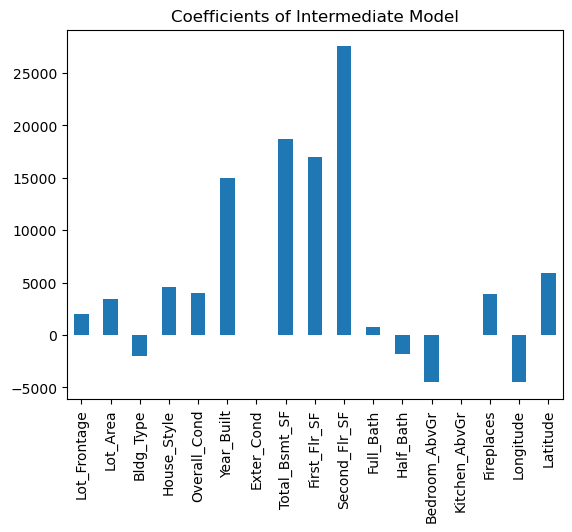

In [50]:
coefficients = pd.Series(ridge_cv.coef_, index=data_x.columns)
print(coefficients)
coefficients.plot(kind='bar')
plt.title('Coefficients of Intermediate Model')
print(f"Intercept Intermediate Model: {ridge_cv.intercept_:.2f}")
plt.show()

#### Final Ridge Regression Model

Lot_Frontage      1958.605177
Lot_Area          3419.610309
Bldg_Type        -1973.906176
House_Style       4534.998914
Overall_Cond      4044.863747
Year_Built       14964.752669
Exter_Cond           0.000000
Total_Bsmt_SF    18675.515723
First_Flr_SF     16999.441410
Second_Flr_SF    27536.909781
Full_Bath          772.205069
Half_Bath        -1801.586825
Bedroom_AbvGr    -4517.947936
Kitchen_AbvGr        0.000000
Fireplaces        3905.622448
Longitude        -4495.401790
Latitude          5903.027366
dtype: float64
Intercept of Final Model: 171569.07


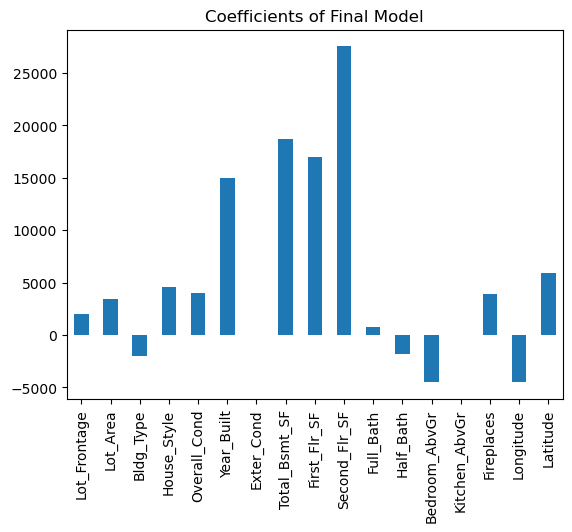

In [51]:
coefficients_final = pd.Series(final_ridge.coef_, index=data_x.columns)
print(coefficients_final)
coefficients_final.plot(kind='bar')
plt.title('Coefficients of Final Model')
print(f"Intercept of Final Model: {final_ridge.intercept_:.2f}")
plt.show()

# Diagnostics

#### OLS Model Shapiro-Wilk Test for Normality

In [52]:
from scipy.stats import shapiro
p_value = shapiro(model_final_ols.resid)
print(f'Shapiro-Wilk p-value: {p_value}')

Shapiro-Wilk p-value: ShapiroResult(statistic=0.9664439558982849, pvalue=9.241964967843588e-14)


#### OLS Model Breusch-Pagan test for Homoscedasticity

In [53]:
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(model_final_ols.resid, sm.add_constant(x_train))
print(f'Breusch-Pagan p-value: {p_value}')

Breusch-Pagan p-value: 3.292248212175896e-18


#### OLS Model Checking Linearity, Normality of Residuals and Homoscendasticity 

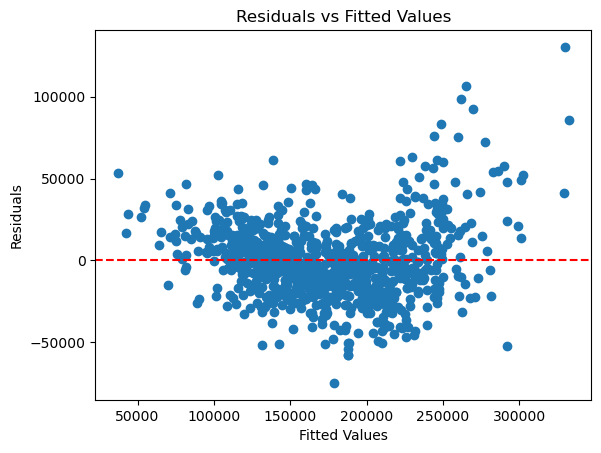

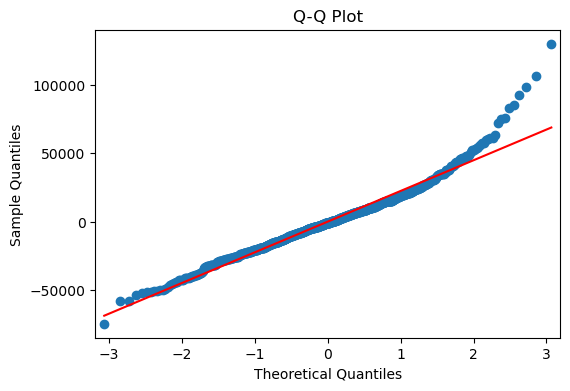

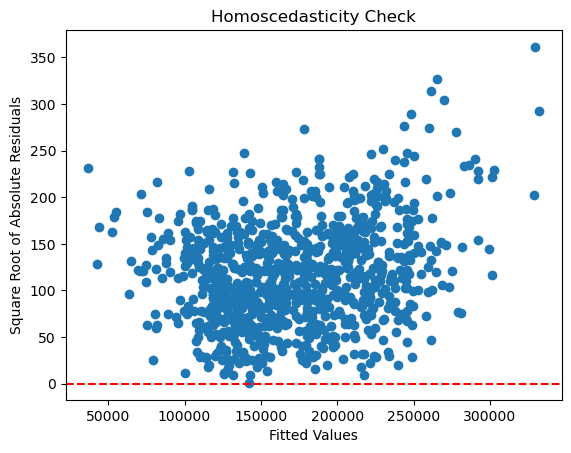

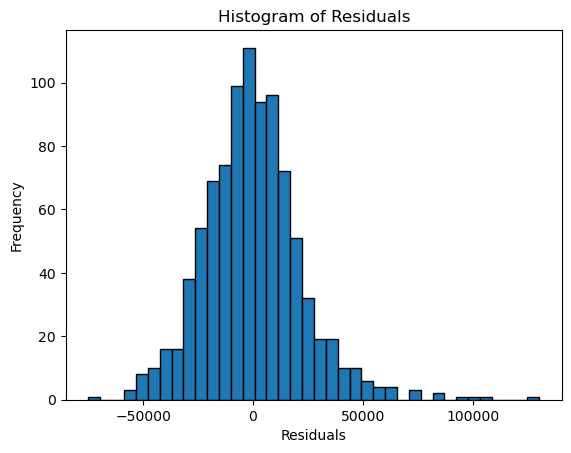

In [54]:
# Check for Linearity
plt.scatter(model_final_ols.fittedvalues, model_final_ols.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Check for Normality of Residuals
residuals = model_final_ols.resid
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Q-Q Plot')
plt.show()

# Homoscedasticity Check
plt.scatter(model_final_ols.fittedvalues, np.sqrt(np.abs(residuals)))
plt.axhline(color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Histogram plot of residuals
residuals = model_final_ols.resid 
plt.hist(residuals, bins='auto', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Ridge Regression Model Checking Linearity, Normality of Residuals and Homoscendasticity 

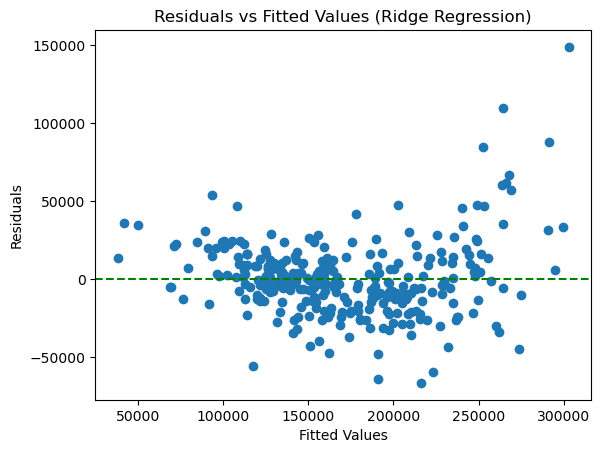

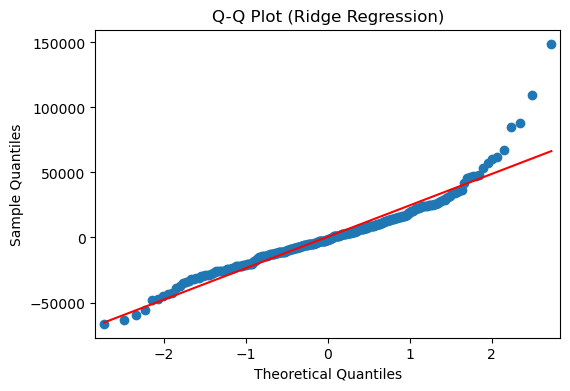

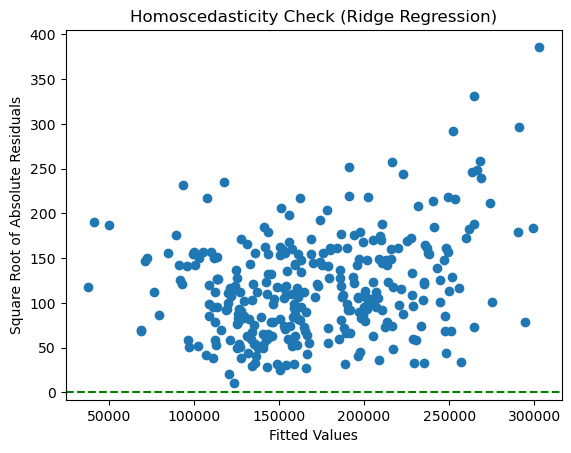

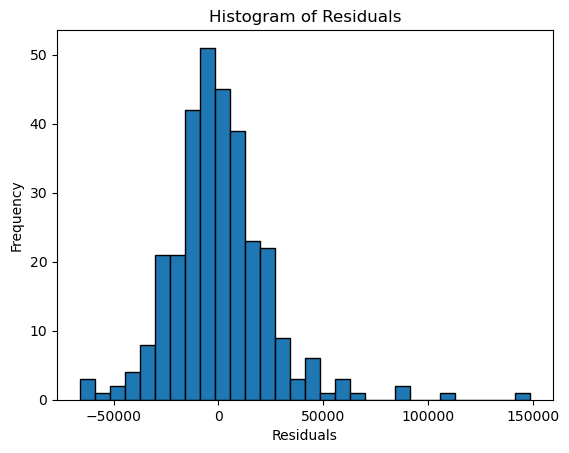

In [55]:
alpha = 1.0  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

# Check for Linearity
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(color='g', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Ridge Regression)')
plt.show()

# Check for Normality of Residuals
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Q-Q Plot (Ridge Regression)')
plt.show()

# Homoscedasticity Check
plt.scatter(y_pred, np.sqrt(np.abs(residuals)))
plt.axhline(color='g', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Homoscedasticity Check (Ridge Regression)')
plt.show()

# Histogram plot of residuals
plt.hist(residuals, bins='auto', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Evaluation
finding MSE and R square value

### OLS

#### Evaluation of intermediate OLS model

In [56]:
X_test_intermediate = sm.add_constant(X_test_scaled)
y_pred_intermediate = model_intermediate_ols.predict(X_test_intermediate)
mse_intermediate = mean_squared_error(y_test, y_pred_intermediate)
r_sq_intermediate = r2_score(y_test, y_pred_intermediate)
print(f'Mean Squared Error ( OLS Intermediate Model): {mse_intermediate}')
print("\nR-squared value ( OLS Intermediate Model):",r_sq_intermediate)

Mean Squared Error ( OLS Intermediate Model): 572659942.0445561

R-squared value ( OLS Intermediate Model): 0.8309278289482366


#### Evaluation of final OLS model

In [57]:
X_test_final = sm.add_constant(X_test_scaled)
y_pred_final = model_final_ols.predict(X_test_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r_sq_final = r2_score(y_test, y_pred_final)
print(f'Mean Squared Error (Final Model): {mse_final}')
print("\nR-squared value (Final Model):",r_sq_final)

Mean Squared Error (Final Model): 572659942.0445561

R-squared value (Final Model): 0.8309278289482366


### Ridge Regression

#### Evaluation of intermediate Ridge Regression Model

In [58]:
y_pred_intermediate = ridge_cv.predict(X_test_scaled)
mse_intermediate = mean_squared_error(y_test, y_pred_intermediate)
print(f'Mean Squared Error (Intermediate Ridge Regression Model): {mse_intermediate}')
r_sq_intermediate = r2_score(y_test, y_pred_intermediate)
print("\nR-squared value (Intermediate Ridge Regression Model):",r_sq_intermediate)

Mean Squared Error (Intermediate Ridge Regression Model): 574253862.0523953

R-squared value (Intermediate Ridge Regression Model): 0.830457239866615


#### Evaluation of final Ridge Regression Model

In [59]:
y_pred_final = final_ridge.predict(X_test_scaled)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f'Mean Squared Error (Final Ridge Regression Model): {mse_final}')
r_sq_final = r2_score(y_test, y_pred_final)
print("\nR-squared value (Final Ridge Regression Model):",r_sq_final)

Mean Squared Error (Final Ridge Regression Model): 574253862.0523627

R-squared value (Final Ridge Regression Model): 0.8304572398666247


## Interpretation of the parameters of the final model

here all the co-efficient for the model is visible

#### For OLS model as it fetched better result than Ridge Regression Model:

In [60]:
coefficients = model_final_ols.params
print("Coefficients:")
print(coefficients)

Coefficients:
const    1.715691e+05
x1       1.934239e+03
x2       3.387224e+03
x3      -1.975635e+03
x4       4.340700e+03
x5       4.071851e+03
x6       1.515507e+04
x7      -1.049252e-11
x8       1.871061e+04
x9       1.723237e+04
x10      2.827724e+04
x11      4.364225e+02
x12     -2.073974e+03
x13     -4.665097e+03
x14      1.123734e-12
x15      3.881279e+03
x16     -4.526533e+03
x17      5.960783e+03
dtype: float64
